In [10]:
#This code makes the slide show prettier by hiding the raw code.
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

#Python code for taking my CS2 computation data and producing a plot.


I ran each job sequentially and recorded the final single point energy and time it took to get that value.
I plotted each all of the data to determine what basis set I should use for determing a PES.

In [1]:
import matplotlib.pyplot as plt
import pandas
import numpy
%matplotlib inline



In [2]:

allData = pandas.read_excel("/Users/Ignare/Copy/Work/Research/Basis_Set_table.xlsx")

#allData.sort(['Energy','Count'], inplace= True)
#allData = allData.Count.sort(inplace=True)

allData.head()


,Coverging Basis Set,Count,Basis,Energy,Time(s),Seconds,Difference from min,Percent Diff,Error,Running,redo
0,NaN,1,DUNNING-DZP,-833.283565,00:00:25,25,-0.251204,0.030146,NaN,NaN,NaN
1,NaN,2,cc-pVDZ,-833.337239,00:00:26,26,-0.197530,0.023704,NaN,NaN,NaN
2,NaN,3,cc-(p)VDZ,-833.337239,00:00:26,26,-0.197530,0.023704,NaN,NaN,NaN
3,NaN,4,cc-pCVDZ,-833.345095,00:00:00,47,-0.189674,0.022761,NaN,NaN,NaN
4,NaN,5,aug-cc-pVDZ,-833.352770,00:00:44,44,-0.181999,0.021839,NaN,NaN,-833.3536


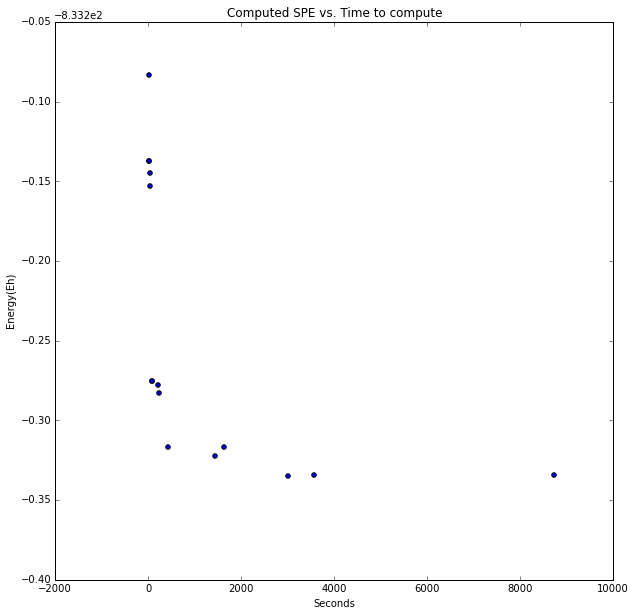

In [18]:
colors = numpy.random.rand(23)
xaxis =numpy.count_nonzero(23)
scatter_plot = plt.figure(figsize=(10, 10))
xaxis = 'Seconds'
yaxis = 'Energy'
size = 'Percent Diff'
title = "Computed SPE vs. Time to compute"

#Make center dots on graph
dots = scatter_plot.add_subplot(1,1,1)
dots.scatter(allData[xaxis],allData['Energy'])

#Make the circles around the dots based on time
ax = scatter_plot.add_subplot(1,1,1)
ax.scatter(allData[xaxis],
           allData[yaxis],
           s = allData[size]*0,
           c=colors,
           
           alpha =.3
          )
ax.set_title(title)
ax.set_xlabel(xaxis)
ax.set_ylabel("Energy(Eh)")



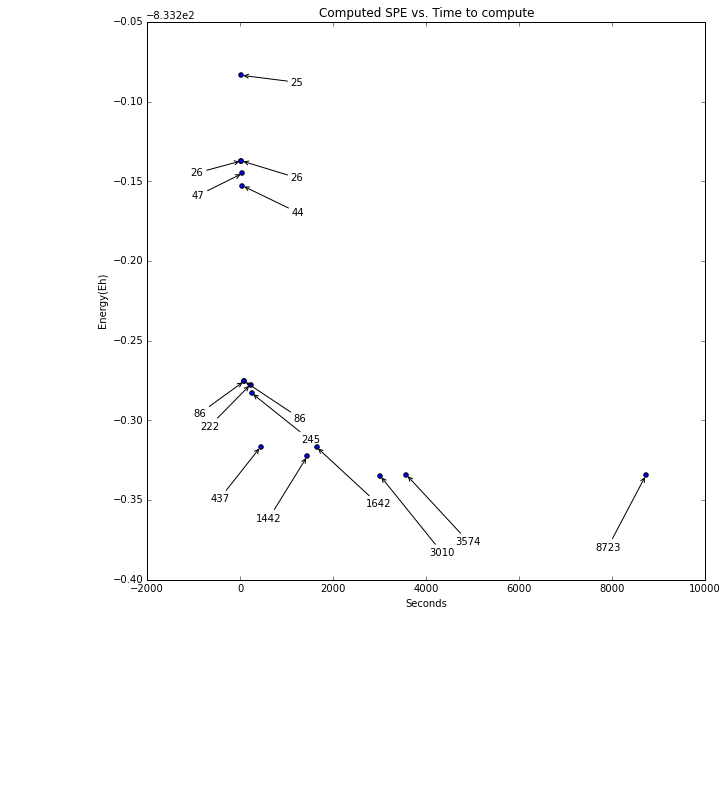

In [19]:
colors = numpy.random.rand(23)
xaxis =numpy.count_nonzero(23)
scatter_plot = plt.figure(figsize=(10, 10))
xaxis = 'Seconds'
yaxis = 'Energy'
size = 'Percent Diff'
#Make center dots on graph
dots = scatter_plot.add_subplot(1,1,1)
dots.scatter(allData[xaxis],allData['Energy'])

#Make the circles around the dots based on time
ax = scatter_plot.add_subplot(1,1,1)
ax.scatter(allData[xaxis], allData[yaxis], s = allData[size]*0,c=colors, alpha =.3)
ax.set_title("Computed SPE vs. Time to compute")
ax.set_xlabel(xaxis)
ax.set_ylabel("Energy(Eh)")

#Annotate

for i in range(0, 23):
    value = (-1)**(i)*50
    ax.annotate(allData[xaxis][i], (allData[xaxis][i], allData[yaxis][i],),
                xycoords='data',
                xytext=(value,-10-5*i),
                textcoords='offset points',
                arrowprops=dict(arrowstyle="->")
               )


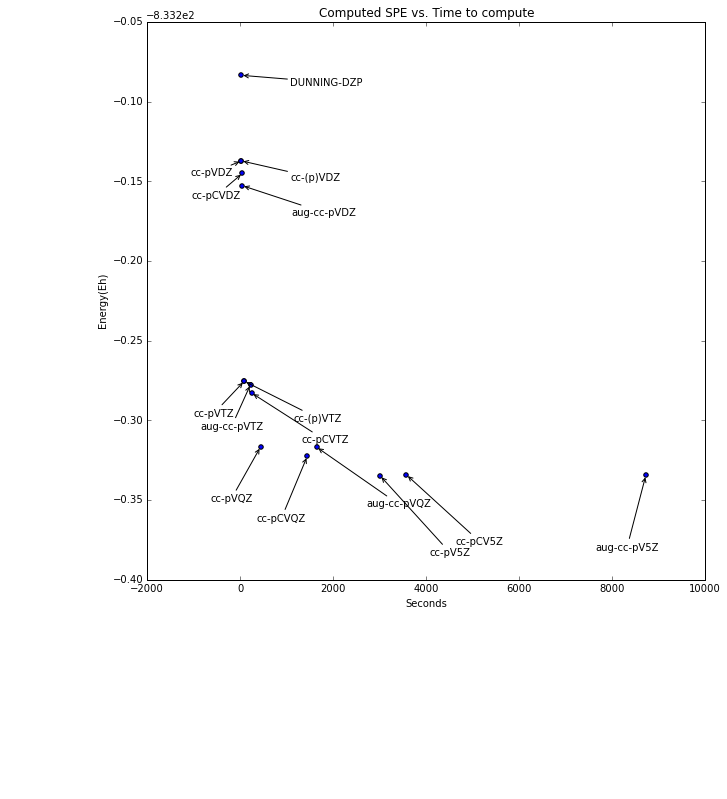

In [25]:
colors = numpy.random.rand(23)
xaxis =numpy.count_nonzero(23)
scatter_plot = plt.figure(figsize=(10, 10))
xaxis = 'Seconds'
yaxis = 'Energy'
size = 'Percent Diff'
#Make center dots on graph
dots = scatter_plot.add_subplot(1,1,1)
dots.scatter(allData[xaxis],allData['Energy'])

#Make the circles around the dots based on time
ax = scatter_plot.add_subplot(1,1,1)
ax.scatter(allData[xaxis], allData[yaxis], s = allData[size]*0,c=colors, alpha =.3)
ax.set_title("Computed SPE vs. Time to compute")
ax.set_xlabel(xaxis)
ax.set_ylabel("Energy(Eh)")

#Annotate

for i in range(0, 23):
    value = (-1)**(i)*50
    ax.annotate(allData['Basis'][i], (allData[xaxis][i], allData[yaxis][i],),
                xycoords='data',
                xytext=(value,-10-5*i),
                textcoords='offset points',
                arrowprops=dict(arrowstyle="->")
               )

##Conclusion
Based on these figures I believe that cc-PVQZ is the best fit to use.

This is a latex test
$$c = \sqrt{a^2 + b^2}$$


## Next evaluate if the chosen basis set can produce accurate values based on experimental data

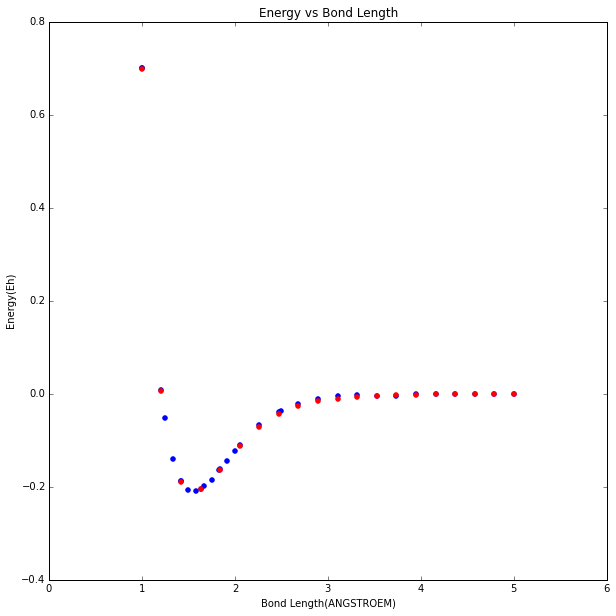

In [97]:
#Import data
dissData = pandas.read_excel("/Users/Ignare/Copy/Work/Research/Dissociation_Energy.xlsx")
#dissData.head()

#Plot Data
dissPlot = plt.figure(figsize=(10,10))
mrci = dissPlot.add_subplot(1,1,1)
mrci.scatter(dissData['BondL'], dissData['C.Energy'], color = 'blue')
mrci.set_title("Energy vs Bond Length")
mrci.set_xlabel('Bond Length(ANGSTROEM)')
mrci.set_ylabel("Energy(Eh)")

#Plot CCSD Data for comparison's sake
ccsd = dissPlot.add_subplot(1,1,1)
ccsd.scatter(dissData['BondL.CCSD'], dissData['C.Energy.CCSD'], color = 'red')

#I Need to figure out how to do a legend
#dissPlot.legend()
#mrci.legend()

#From this graph we can compute the dissociation energy

####Computed
* 0.20950562 Eh
* 45,981.168432 cm^-1
* 550.05704721 kJ/mol
* 5.7009410186 eV

####Experimental

#Ionization Energies
To do this I am running two MRCI jobs that are identical save for one of them having a positive charge. This technique didn't work.

#Koopmans' theorem
Ionization is equal to negative the energy of the HOMO

####Computed

* 10.1434 eV

####Experimental
* 10.078 eV

[Reference](http://webbook.nist.gov/cgi/cbook.cgi?ID=C75150&Mask=20#Ion-Energetics)

# Generate 3d PES based on 'quick' sample

In [24]:
#This imports from the plotly library and then logs in with my credentials
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
tls.set_credentials_file(username="ignare", 
                             api_key="jebd3q1qet")

In [98]:
temp = Scatter3d(x = dissData['BL'],
                y = dissData['BA'],
                z = dissData['Energy.1'],
                mode='markers',      # (!) draw lines between coords (as in Scatter)
                marker=Marker(
                    symbol = 'cross',
                    color = dissData['Energy.1']
                )
            )
data = Data([temp])
layout = Layout(
        #Overall title
        title = "Energy vs Bond Legth and Bond Angle",
        #The axis are contained in a scene object for 3d plots
        scene = Scene(
            xaxis=XAxis(title='Bond Length(Ang)'),
            yaxis=YAxis(title='Bond Angle(Deg)'),
            zaxis=ZAxis(title='Energy(Eh)')
        )
            
    )
fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [70]:
#Push out to plotly website
py.plot(fig, filename='Sample PES')

u'https://plot.ly/~ignare/115'

In [40]:
ls

1,2,5,6,9,10-Hexabromocyclododecane.cml  Copy/                                    Movies/                                  SuperComputers/                          plot.tif
ALEKS.ipynb                              Desktop/                                 Music/                                   Test                                     rsync-ignore
Applications/                            Documents/                               OneDrive/                                Test.html                                vmdscene.dat
Applications (Parallels)/                Downloads/                               Orca-Play/                               Untitled.ipynb                           vmdscene.dat.tga
CS2-Converge.ipynb                       Dropbox/                                 Pictures/                                anaconda/                                vmdscene.pov
Calibre Library/                         Icons/                                   Public/                          

In [41]:
help(plotly.graph_objs.Marker)

Help on class Marker in module plotly.graph_objs.graph_objs:

class Marker(PlotlyDict)
 |  A dictionary-like object containing specifications of the marker points.
 |  
 |  Online examples:
 |  
 |      https://plot.ly/python/line-and-scatter/
 |      https://plot.ly/python/bubble-charts/
 |  
 |  Parent key:
 |  
 |      marker
 |  
 |  Quick method reference:
 |  
 |      Marker.update(changes)
 |      Marker.strip_style()
 |      Marker.get_data()
 |      Marker.to_graph_objs()
 |      Marker.validate()
 |      Marker.to_string()
 |      Marker.force_clean()
 |  
 |  Valid keys:
 |  
 |      color [required=False] (value=list or 1d numpy array of string
 |      describing color) (streamable):
 |          Sets the color of the face of the marker object. If 'color' is
 |          linked to a list or 1d numpy array of color strings, color values
 |          are mapped to individual marker points in the same order as in the
 |          data lists or arrays. To set the color of the marke

In [73]:
#Prepare to Play sound
from IPython.display import Audio
sound_file = 'http://www.thanatosrealms.com/war2/sounds/humans/peasant/work-complete.wav'
# Play the sound
Audio(url=sound_file, autoplay=True)